In [1]:
import os
import glob
from functools import reduce

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Analysis
---

Description: This is a test for fan-out evaluation. A publisher publishes messages to a varying number of subscribers. The VM hosting the publisher is pinned to a sinlge core (core 9), and the publisher process -- along with all its threads -- is pinned to a single core (core 3). The interval is set to 1ms.

In [3]:
results_dir = "../../../results/pub/vms/fanout/"
data_time = "20170730012928.038054"

cols = ['%cpu', '%mem'] 

In [4]:
radio_data_dict = {}

for i in glob.glob(results_dir + data_time + "/radio_stats_with__*"):
    count = eval(i.split('__')[1].split('_')[1].replace('x','*'))
    radio_data_dict[count] = pd.read_csv(i, sep=' ', header=None, na_filter=False, names = cols)

sorted(radio_data_dict.keys())

[2, 4, 8, 16, 32, 64, 128, 256]

In [5]:
kvm_data_dict = {}

for i in glob.glob(results_dir + data_time + "/kvm_stats_with__*"):
    count = eval(i.split('__')[1].split('_')[1].replace('x','*'))
    kvm_data_dict[count] = pd.read_csv(i, sep=' ', header=None, na_filter=False, names = cols)

sorted(kvm_data_dict.keys())

[2, 4, 8, 16, 32, 64, 128, 256]

In [6]:
usage = pd.DataFrame()

usage['subs'] = sorted(radio_data_dict.keys())
usage['%vcpu'] = [radio_data_dict[i]['%cpu'].mean() for i in usage['subs']]
usage['%vmem'] = [radio_data_dict[i]['%mem'].mean() for i in usage['subs']]
usage['%pcpu'] = [kvm_data_dict[i]['%cpu'].mean() for i in usage['subs']]
usage['%pmem'] = [kvm_data_dict[i]['%mem'].mean() for i in usage['subs']]

usage = usage.set_index('subs')

usage

,%vcpu,%vmem,%pcpu,%pmem
subs,,,,
2,4.653846,0.023077,7.191667,4.8
4,5.327273,0.100000,8.580000,4.8
8,6.400000,0.100000,9.358333,4.8
16,9.054545,0.100000,12.470000,4.8
32,14.527273,0.100000,17.840000,4.8
64,25.518750,0.200000,28.918750,4.8
128,49.445000,0.300000,52.505000,4.8
256,92.467391,0.500000,94.404444,4.8


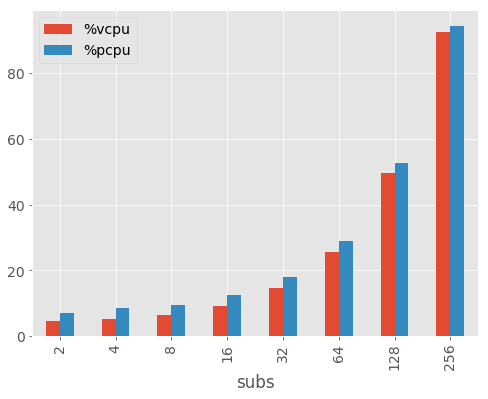

In [7]:
usage[['%vcpu', '%pcpu']].plot(kind='bar')

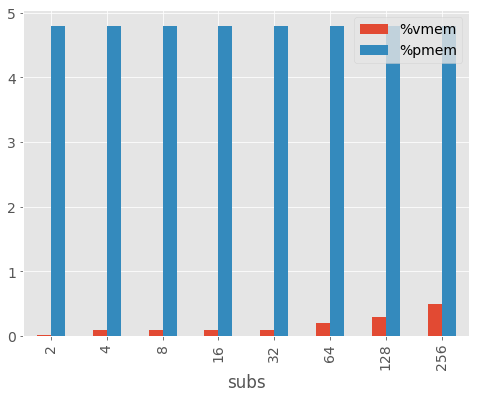

In [8]:
usage[['%vmem', '%pmem']].plot(kind='bar')